# Librerias

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # crear graficos https://matplotlib.org/
import seaborn as sns # para crear graficos parecido a ggplot2 de R  https://seaborn.pydata.org/examples/index.html

# Lectura de datos

In [54]:
misdatos = pd.read_csv('http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2023-03-15/visualisations/listings.csv')
misdatos.shape

(21239, 18)

In [55]:
misdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21239 entries, 0 to 21238
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21239 non-null  int64  
 1   name                            21235 non-null  object 
 2   host_id                         21239 non-null  int64  
 3   host_name                       21236 non-null  object 
 4   neighbourhood_group             21239 non-null  object 
 5   neighbourhood                   21239 non-null  object 
 6   latitude                        21239 non-null  float64
 7   longitude                       21239 non-null  float64
 8   room_type                       21239 non-null  object 
 9   price                           21239 non-null  int64  
 10  minimum_nights                  21239 non-null  int64  
 11  number_of_reviews               21239 non-null  int64  
 12  last_review                     

In [56]:
# Mirar los valores perdidos o nans:
# Identificamos el número de missing values en cada columna
misdatos.isnull().sum()

id                                    0
name                                  4
host_id                               0
host_name                             3
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4071
reviews_per_month                  4071
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           18494
dtype: int64

In [57]:
misdatos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,90,4,102,2022-11-29,0.64,1,168,13,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.32,2,226,0,NaN
2,24805,Gran Via Studio Madrid,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,26,2022-12-25,0.26,1,126,9,NaN
3,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,3,185,2023-03-04,1.18,1,344,27,NaN
4,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,34217435,Luis,Centro,Justicia,40.41969,-3.69736,Entire home/apt,98,2,132,2023-01-22,0.86,10,268,9,NaN


# Limpieza de datos

In [58]:
data = misdatos.copy()
data.shape

(21239, 18)

In [59]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [60]:
# renombrar las columnas del dataframe
data.rename(columns = {'name':'nombre', 
                       'host_name':'casero',
                       'neighbourhood_group':'distrito', 
                       'neighbourhood':'zona', 
                       'latitude':'latitud', 
                       'longitude':'longitud', 
                       'room_type':'tipo', 
                       'price':'precio', 
                       'minimum_nights':'min_noches', 
                       'number_of_reviews':'num_reseñas', 
                       'last_review':'ult_reseña', 
                       'reviews_per_month':'reseñas_mes', 
                       'calculated_host_listings_count':'metrica', 
                       'availability_365':'disponibilidad', 
                       'number_of_reviews_ltm':'num_reseñas_ltm', 
                       'license':'licencia'
                      }, inplace = True)
data.columns

Index(['id', 'nombre', 'host_id', 'casero', 'distrito', 'zona', 'latitud',
       'longitud', 'tipo', 'precio', 'min_noches', 'num_reseñas', 'ult_reseña',
       'reseñas_mes', 'metrica', 'disponibilidad', 'num_reseñas_ltm',
       'licencia'],
      dtype='object')

## Variables

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21239 entries, 0 to 21238
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21239 non-null  int64  
 1   nombre           21235 non-null  object 
 2   host_id          21239 non-null  int64  
 3   casero           21236 non-null  object 
 4   distrito         21239 non-null  object 
 5   zona             21239 non-null  object 
 6   latitud          21239 non-null  float64
 7   longitud         21239 non-null  float64
 8   tipo             21239 non-null  object 
 9   precio           21239 non-null  int64  
 10  min_noches       21239 non-null  int64  
 11  num_reseñas      21239 non-null  int64  
 12  ult_reseña       17168 non-null  object 
 13  reseñas_mes      17168 non-null  float64
 14  metrica          21239 non-null  int64  
 15  disponibilidad   21239 non-null  int64  
 16  num_reseñas_ltm  21239 non-null  int64  
 17  licencia    

In [62]:
# Mirar los valores perdidos o nans:
# Identificamos el número de missing values en cada columna
data.isnull().sum()

id                     0
nombre                 4
host_id                0
casero                 3
distrito               0
zona                   0
latitud                0
longitud               0
tipo                   0
precio                 0
min_noches             0
num_reseñas            0
ult_reseña          4071
reseñas_mes         4071
metrica                0
disponibilidad         0
num_reseñas_ltm        0
licencia           18494
dtype: int64

### nombre

In [63]:
data['nombre'].value_counts()

nombre
Habitación privada                                   23
Fantastic residence ``FUNWAY´´ north zone Madrid     19
Madrid Center: Puerta del Sol, Tirso de Molina       18
Precioso apartamento en Madrid                       18
HOMEABOUT QUO ERASO APARTMENT                        15
                                                     ..
Large room for 4 (2 double beds, bathroom and TV)     1
Twin beds (2), private bathroom, interior             1
Room with double bed, private bathroom and TV         1
Atocha Oasis / Late Check in Available                1
Arties - 4 bedrooms apartment in Almagro              1
Name: count, Length: 20301, dtype: int64

In [64]:
#sustituir valores nulos por otro valor
data["nombre"].fillna('desconocido', inplace = True)
data['nombre'].isnull().sum()

0

### host_id

In [65]:
data['host_id'].value_counts()

host_id
377605855    263
346367515    148
471977881    143
434208714    127
28038703     101
            ... 
217227097      1
108022834      1
8128884        1
217291591      1
180690451      1
Name: count, Length: 11080, dtype: int64

### casero

In [66]:
#sustituir valores nulos por otro valor
data["casero"].fillna('desconocido', inplace = True)
data['casero'].isnull().sum()

0

In [67]:
data['casero'].value_counts()

casero
Javier    285
Carlos    283
Marco     279
Jorge     250
Daniel    212
         ... 
Rob         1
Duco        1
Mat         1
J&E         1
Dica        1
Name: count, Length: 3972, dtype: int64

### distrito

In [68]:
data['distrito'].value_counts()

distrito
Centro                   9439
Salamanca                1440
Chamberí                 1316
Arganzuela               1118
Tetuán                   1021
Retiro                    773
Carabanchel               757
Ciudad Lineal             691
Chamartín                 624
Puente de Vallecas        594
Moncloa - Aravaca         581
Latina                    575
San Blas - Canillejas     487
Hortaleza                 465
Usera                     401
Fuencarral - El Pardo     301
Villaverde                198
Barajas                   165
Moratalaz                 134
Villa de Vallecas          99
Vicálvaro                  60
Name: count, dtype: int64

### zona

In [69]:
data['zona'].value_counts()

zona
Embajadores    2575
Universidad    2017
Palacio        1680
Sol            1187
Justicia       1049
               ... 
Palomas           7
Corralejos        6
Valdemarín        5
El Pardo          1
Horcajo           1
Name: count, Length: 126, dtype: int64

### latitud

In [70]:
data['latitud'].value_counts()

latitud
40.421650    30
40.411260    25
40.410580    18
40.409630    17
40.417350    17
             ..
40.415520     1
40.377900     1
40.383970     1
40.378000     1
40.435959     1
Name: count, Length: 10159, dtype: int64

### longitud

In [71]:
data['longitud'].value_counts()

longitud
-3.707000    31
-3.704090    29
-3.702170    28
-3.702130    16
-3.701460    16
             ..
-3.719230     1
-3.680480     1
-3.714380     1
-3.660340     1
-3.699541     1
Name: count, Length: 10051, dtype: int64

### tipo

In [72]:
data['tipo'].value_counts()

tipo
Entire home/apt    13751
Private room        7074
Shared room          290
Hotel room           124
Name: count, dtype: int64

### precio

In [73]:
data['precio'].value_counts()

precio
100    380
50     365
25     356
30     351
40     348
      ... 
820      1
675      1
497      1
960      1
496      1
Name: count, Length: 642, dtype: int64

In [74]:
# comprobar caracteres extraños 
lista = data['precio'].value_counts() 
# convertir a lista
lista = lista.index.values.tolist() 
# ordenar la lista
#lista.sort(reverse=True) #ascendente
lista.sort(reverse=False) #descendente
# mostrar la lista
lista

[0,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189

In [75]:
# existen registros con precio 0, revisar
valor_filtrado = 0
resultados = data[data['precio'] == valor_filtrado]
resultados 

,id,nombre,host_id,casero,distrito,zona,latitud,longitud,tipo,precio,min_noches,num_reseñas,ult_reseña,reseñas_mes,metrica,disponibilidad,num_reseñas_ltm,licencia
10368,42431404,Hotel Santo Domingo,312813621,Hotel Santo Domingo,Centro,Palacio,40.42065,-3.70854,Hotel room,0,1,44,2023-02-27,2.08,1,0,34,NaN
10442,42535245,TÓTEM Madrid Hotel Boutique,318902993,TÓTEM Madrid Hotel Boutique,Salamanca,Recoletos,40.42660,-3.68542,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
10481,42583183,Scout Madrid Hostel,314090026,Laura,Moratalaz,Media Legua,40.40878,-3.65448,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
10584,43078553,NH Madrid Atocha,310825661,NH Atocha,Retiro,Jerónimos,40.40801,-3.68929,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN


### min_noches

In [76]:
data['min_noches'].value_counts()

min_noches
1      8493
2      4890
3      3024
4       875
30      818
       ... 
93        1
59        1
135       1
289       1
62        1
Name: count, Length: 91, dtype: int64

In [77]:
# comprobar caracteres extraños 
lista = data['min_noches'].value_counts() 
# convertir a lista
lista = lista.index.values.tolist() 
# ordenar la lista
#lista.sort(reverse=True) #ascendente
lista.sort(reverse=False) #descendente
# mostrar la lista
lista

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 39,
 40,
 45,
 48,
 50,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 65,
 70,
 73,
 75,
 80,
 84,
 85,
 88,
 89,
 90,
 93,
 99,
 100,
 109,
 119,
 120,
 125,
 135,
 140,
 150,
 160,
 170,
 180,
 200,
 222,
 225,
 240,
 289,
 300,
 333,
 360,
 364,
 365,
 400,
 500,
 532,
 600,
 700,
 750,
 800,
 999,
 1000,
 1125]

### num_reseñas

In [78]:
data['num_reseñas'].value_counts()

num_reseñas
0      4071
1      1645
2      1053
3       754
4       647
       ... 
576       1
405       1
705       1
561       1
638       1
Name: count, Length: 517, dtype: int64

### ult_reseña

In [79]:
#sustituir valores nulos por otro valor
data["ult_reseña"].fillna('N/A', inplace = True)
data['ult_reseña'].isnull().sum()

0

In [80]:
data['ult_reseña'].value_counts()

ult_reseña
N/A           4071
2023-03-12     877
2023-02-26     735
2023-03-05     674
2023-02-27     563
              ... 
2021-07-07       1
2021-05-15       1
2017-08-30       1
2017-08-02       1
2022-04-04       1
Name: count, Length: 1743, dtype: int64

### reseñas_mes

In [81]:
#sustituir valores nulos por otro valor
data["reseñas_mes"].fillna('0', inplace = True)
data['reseñas_mes'].isnull().sum()

0

In [82]:
data['reseñas_mes'].value_counts()

reseñas_mes
0       4071
0.02     346
1.0      326
0.04     232
0.03     231
        ... 
7.33       1
9.27       1
6.11       1
8.12       1
6.58       1
Name: count, Length: 890, dtype: int64

### metrica

In [83]:
data['metrica'].value_counts()

metrica
1      8509
2      2562
3      1365
4      1028
5       670
6       528
7       490
8       312
11      308
263     263
10      250
9       243
14      196
13      195
96      192
23      184
12      180
17      170
79      158
19      152
25      150
148     148
21      147
16      144
143     143
65      130
127     127
15      120
20      120
34      102
101     101
97       97
32       96
48       96
24       96
47       94
22       88
86       86
81       81
26       78
18       72
36       72
35       70
66       66
64       64
63       63
31       62
61       61
60       60
55       55
53       53
51       51
46       46
43       43
39       39
38       38
37       37
33       33
28       28
27       27
Name: count, dtype: int64

### disponibilidad

In [84]:
data['disponibilidad'].value_counts()

disponibilidad
0      4311
365     775
364     186
89      135
73      134
       ... 
204      18
141      18
206      18
210      17
182      13
Name: count, Length: 366, dtype: int64

### num_reseñas_ltm

In [85]:
data['num_reseñas_ltm'].value_counts()

num_reseñas_ltm
0      7377
1      1310
2       954
3       736
4       612
       ... 
308       1
173       1
147       1
168       1
143       1
Name: count, Length: 156, dtype: int64

### licencia

In [86]:
#sustituir valores nulos por otro valor
data["licencia"].fillna('desconocida', inplace = True)
data['licencia'].isnull().sum()

0

In [87]:
data['licencia'].value_counts()

licencia
desconocida      18494
VT REGISTRADA       49
AM-336              20
VT-3483             15
HM-4817             13
                 ...  
VT-6534              1
VT-6489              1
VT-5604              1
VT-4317              1
613787               1
Name: count, Length: 2322, dtype: int64

# Exploración de las variables

## Eliminar variables

In [88]:
data.columns

Index(['id', 'nombre', 'host_id', 'casero', 'distrito', 'zona', 'latitud',
       'longitud', 'tipo', 'precio', 'min_noches', 'num_reseñas', 'ult_reseña',
       'reseñas_mes', 'metrica', 'disponibilidad', 'num_reseñas_ltm',
       'licencia'],
      dtype='object')

In [89]:
del(data['id'])
del(data['host_id'])
del(data['metrica'])
del(data['num_reseñas_ltm'])
data.columns

Index(['nombre', 'casero', 'distrito', 'zona', 'latitud', 'longitud', 'tipo',
       'precio', 'min_noches', 'num_reseñas', 'ult_reseña', 'reseñas_mes',
       'disponibilidad', 'licencia'],
      dtype='object')

## Exploración univariada

### Variable de salida

In [90]:
# Identificar variable respuesta
respuesta = np.array(['precio'])
respuesta

array(['precio'], dtype='<U6')

In [91]:
# Estadístico descriptivos:

# Medidas de centralidad: Media y mediana
media = data[respuesta].mean()
mediana = data[respuesta].median()
maximo = data[respuesta].max()
minimo = data[respuesta].min()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Maximo': maximo, 'Minimo': minimo})


# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[respuesta].std()
q1 = data[respuesta].quantile(0.25)
q3 = data[respuesta].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

,Media,Mediana,Maximo,Minimo,Desviación Estándar,Cuartil 1,Cuartil 3,IQR,n,Error Estandar,IC lower 95%,IC upper 95%
precio,139.106173,85.0,71577,0,660.313831,50.0,133.0,83.0,21239,4.530888,130.225631,147.986714


*************************************************
Variable = precio
*************************************************
        Frecuencias Relativas  Frecuencias Absolutas
precio                                              
100                  0.017892                    380
50                   0.017185                    365
25                   0.016762                    356
30                   0.016526                    351
40                   0.016385                    348
...                       ...                    ...
820                  0.000047                      1
675                  0.000047                      1
497                  0.000047                      1
960                  0.000047                      1
496                  0.000047                      1

[642 rows x 2 columns]


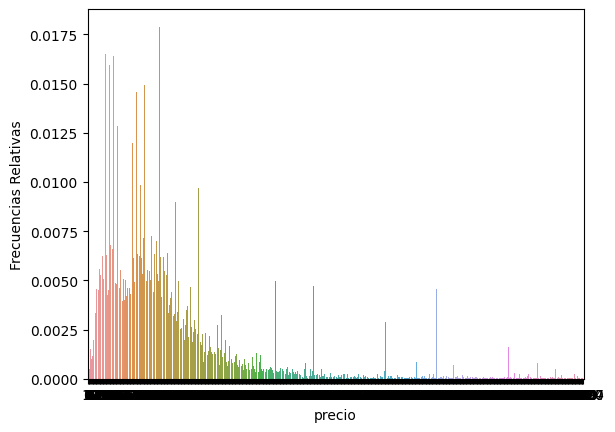

In [92]:
i = respuesta[0]
print("*************************************************")
print("Variable = "+i)
print("*************************************************")
# 1. La tabla de frecuencias de la variable i
pct = pd.DataFrame(data[i].value_counts(normalize=True))
pct.columns = ['Frecuencias Relativas']
pct["Frecuencias Absolutas"] = data[i].value_counts()
print(pct)

# 2. Barplot de la variable i
sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
plt.show()

# # 3. Pieplot de la variable i
# frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
# labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
# colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
# plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
# plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7836\3061592878.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


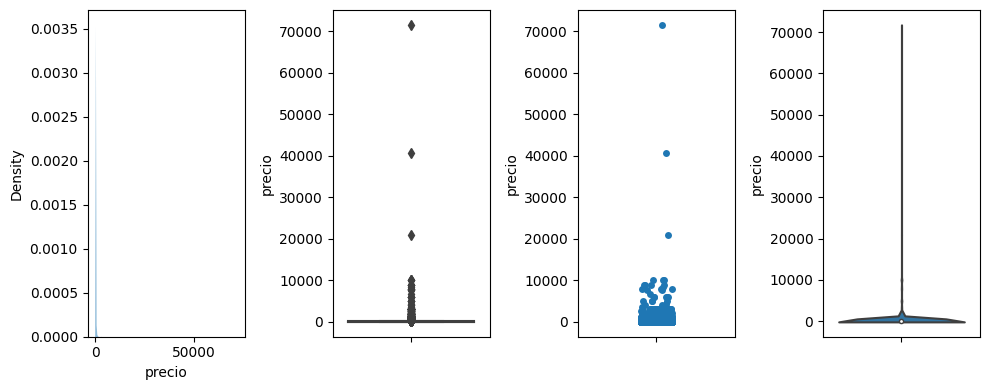

In [93]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in respuesta:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

### Explorar todas las variables cuantitativas y sus correlaciones

In [94]:
# Identificar variables explicativas cuantitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')

nombre            False
casero            False
distrito          False
zona              False
latitud            True
longitud           True
tipo              False
min_noches         True
num_reseñas        True
ult_reseña        False
reseñas_mes       False
disponibilidad     True
licencia          False
Name: 0, dtype: bool

In [95]:
# Identificar las variables cuantitativas. Juntamos los dos pasos anteriores:
var_num = data.drop(respuesta[0], axis=1).columns[(tipos_variables[0]=='int64') |
                                                        (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

,0
0,latitud
1,longitud
2,min_noches
3,num_reseñas
4,disponibilidad


In [96]:
#eliminar variables
# Eliminar variables (columnas)
col_eliminar = ['latitud', 'longitud']
var_num = var_num.drop(col_eliminar)
var_num

Index(['min_noches', 'num_reseñas', 'disponibilidad'], dtype='object')

In [97]:
# Estadístico descriptivos:

# Medidas de centralidad: Media y mediana
media = data[var_num].mean()
mediana = data[var_num].median()
maximo = data[var_num].max()
minimo = data[var_num].min()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Maximo': maximo, 'Minimo': minimo})

# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[var_num].std()
q1 = data[var_num].quantile(0.25)
q3 = data[var_num].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

,Media,Mediana,Maximo,Minimo,Desviación Estándar,Cuartil 1,Cuartil 3,IQR,n,Error Estandar,IC lower 95%,IC upper 95%
min_noches,7.217430,2.0,1125,1,34.128424,1.0,3.0,2.0,21239,0.234180,6.758438,7.676422
num_reseñas,42.764396,10.0,889,0,78.737076,1.0,47.0,46.0,21239,0.540272,41.705463,43.823328
disponibilidad,166.416969,161.0,365,0,134.134405,22.0,297.0,275.0,21239,0.920393,164.612999,168.220938


C:\Users\Admin\AppData\Local\Temp\ipykernel_7836\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


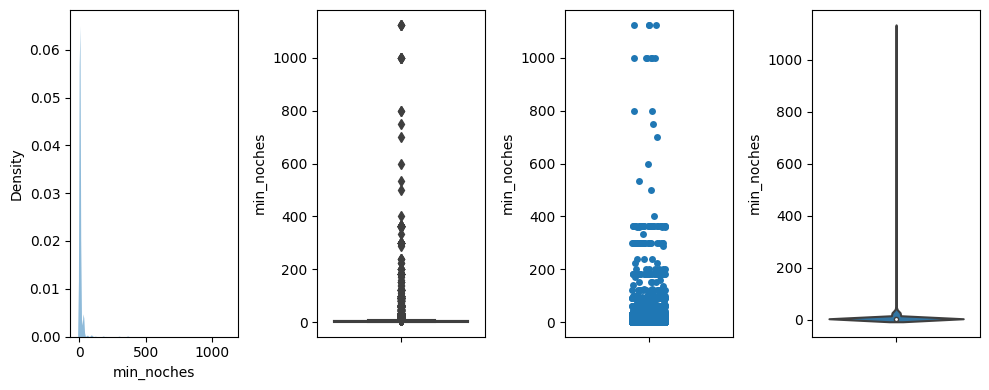

C:\Users\Admin\AppData\Local\Temp\ipykernel_7836\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


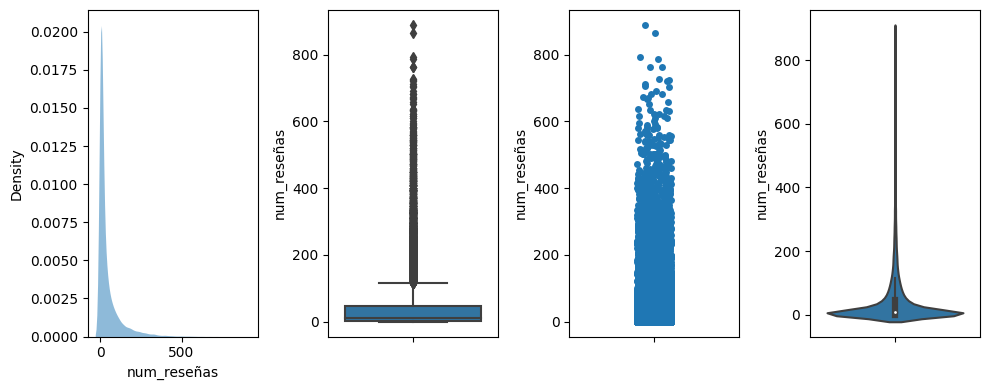

C:\Users\Admin\AppData\Local\Temp\ipykernel_7836\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


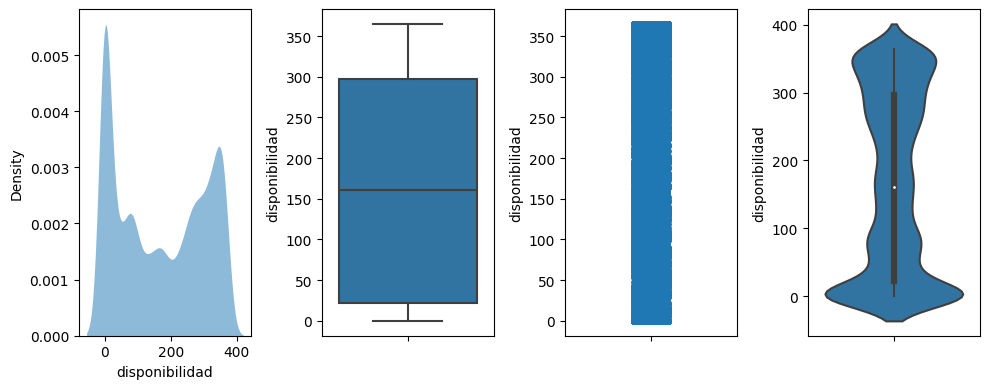

In [98]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

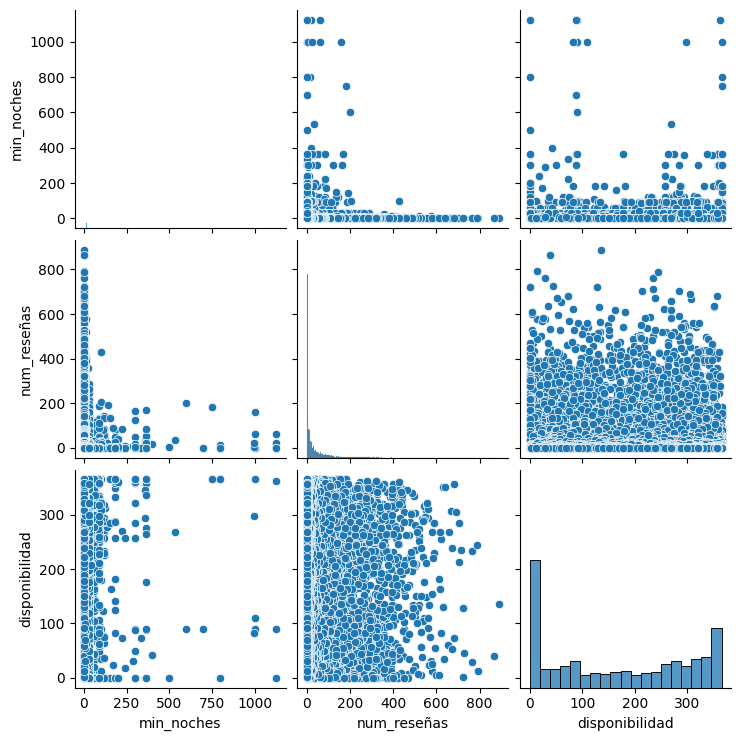

In [99]:
# Matrixplot
# seaborn
sns.pairplot(data[var_num])
plt.show()

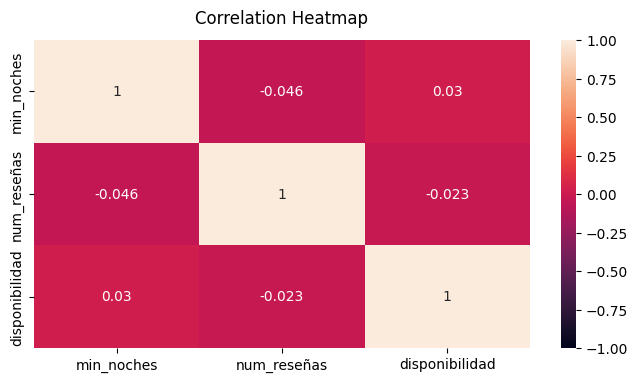

In [100]:
# Correlograma:
X = data[var_num]

# Increase the size of the heatmap.
plt.figure(figsize=(8, 4))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

### Explorar todas las variables cualitativas

In [104]:
# Identificar las variables cualitativas. Juntamos los dos pasos anteriores:
var_cual = data.drop(respuesta[0], axis=1).columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

,0
0,nombre
1,casero
2,distrito
3,zona
4,tipo
5,ult_reseña
6,reseñas_mes
7,licencia


In [105]:
#eliminar variables
# Eliminar variables (columnas)
col_eliminar = ['nombre', 'casero', 'ult_reseña', 'licencia']
var_cual = var_cual.drop(col_eliminar)
var_cual

Index(['distrito', 'zona', 'tipo', 'reseñas_mes'], dtype='object')

*************************************************
Variable = distrito
*************************************************
                       Frecuencias Relativas  Frecuencias Absolutas
distrito                                                           
Centro                              0.444418                   9439
Salamanca                           0.067800                   1440
Chamberí                            0.061961                   1316
Arganzuela                          0.052639                   1118
Tetuán                              0.048072                   1021
Retiro                              0.036395                    773
Carabanchel                         0.035642                    757
Ciudad Lineal                       0.032534                    691
Chamartín                           0.029380                    624
Puente de Vallecas                  0.027967                    594
Moncloa - Aravaca                   0.027355                    

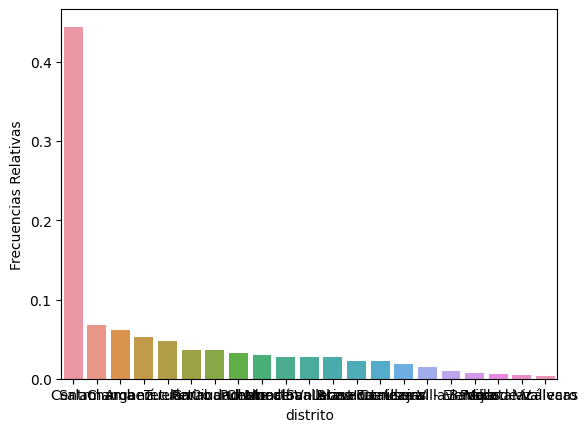

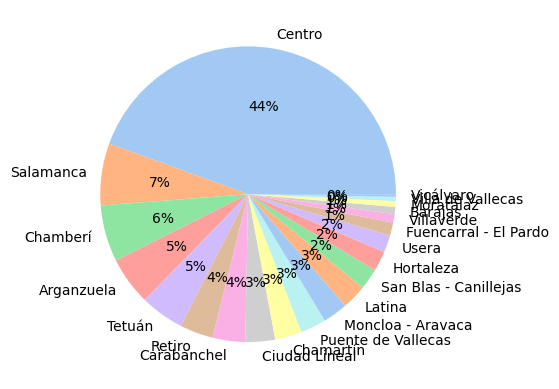

*************************************************
*************************************************
*************************************************
Variable = zona
*************************************************
             Frecuencias Relativas  Frecuencias Absolutas
zona                                                     
Embajadores               0.121239                   2575
Universidad               0.094967                   2017
Palacio                   0.079100                   1680
Sol                       0.055888                   1187
Justicia                  0.049390                   1049
...                            ...                    ...
Palomas                   0.000330                      7
Corralejos                0.000282                      6
Valdemarín                0.000235                      5
El Pardo                  0.000047                      1
Horcajo                   0.000047                      1

[126 rows x 2 columns]


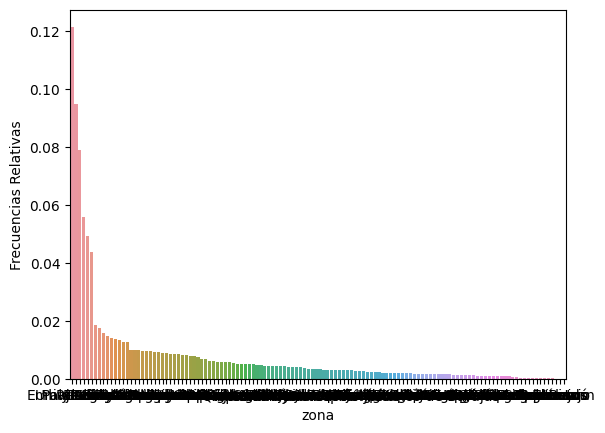

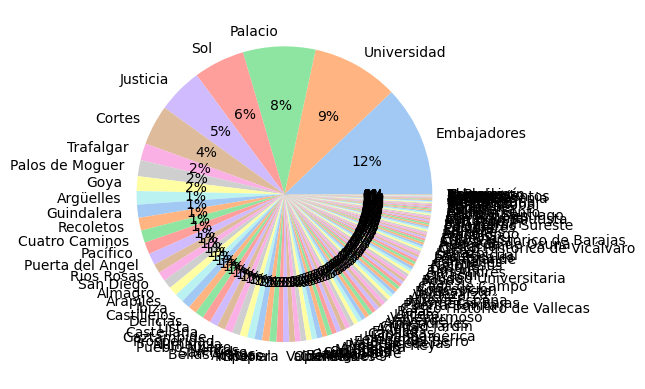

*************************************************
*************************************************
*************************************************
Variable = tipo
*************************************************
                 Frecuencias Relativas  Frecuencias Absolutas
tipo                                                         
Entire home/apt               0.647441                  13751
Private room                  0.333067                   7074
Shared room                   0.013654                    290
Hotel room                    0.005838                    124


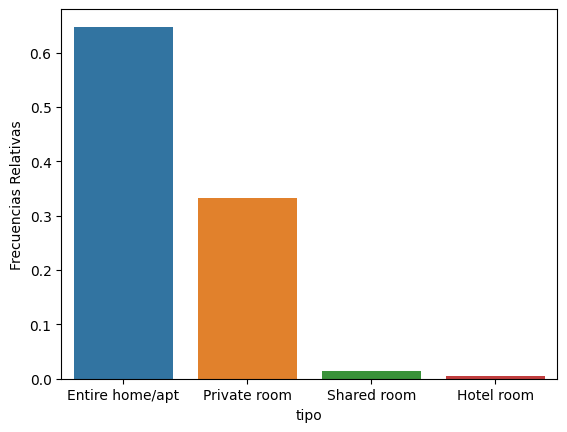

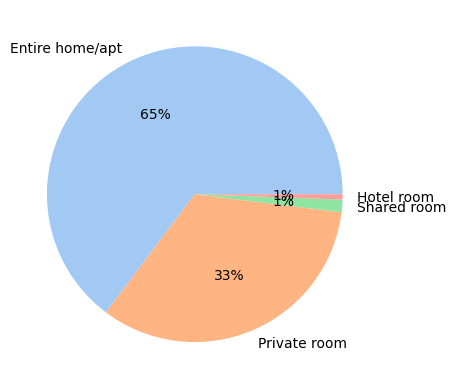

*************************************************
*************************************************
*************************************************
Variable = reseñas_mes
*************************************************
             Frecuencias Relativas  Frecuencias Absolutas
reseñas_mes                                              
0                         0.191676                   4071
0.02                      0.016291                    346
1.0                       0.015349                    326
0.04                      0.010923                    232
0.03                      0.010876                    231
...                            ...                    ...
7.33                      0.000047                      1
9.27                      0.000047                      1
6.11                      0.000047                      1
8.12                      0.000047                      1
6.58                      0.000047                      1

[890 rows x 2 columns]

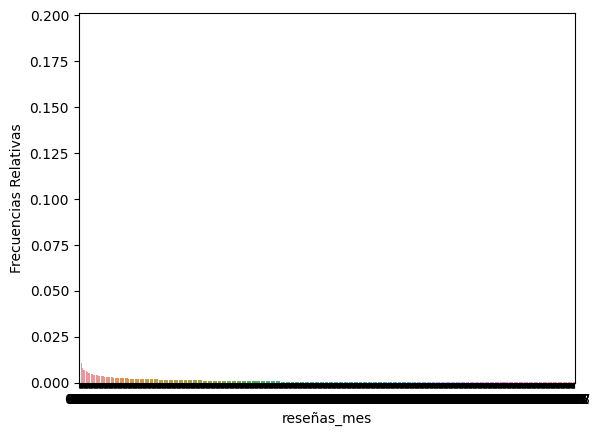

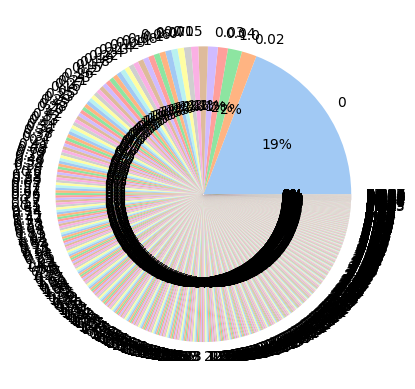

*************************************************
*************************************************


In [106]:
# gráficos y tablas de frecuencias de todas las variables cualitativas:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
    # 2. Barplot de la variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
    labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
    colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

## Exploración multivariada

-  (no aplica, variable de salida numerica)